# 1. Customer Demographic

# - All the code and in depth analysis is below the description!

# Customer Demographic: Data Quality Issues and resolving methods used

- **Last Name:** Contains Last names of customers. There were customers whose last name were not filled, We can remove those missing values from this column but since all customers have filled their first name it will be enough to identify the customers so we didn't remove values from this column. The Data Quality Issue in this column was **Incompleteness**.

- **Gender:** Contains the genders of each customers. But there was an **Inconsistency** in the values that were under this column. "M" and "Male" were put to indicate Male gender and "F", "Femal" and "Female" were put to indicate Female gender. We fixed this issue by replacing all "Male" with "M" and "F" for "Female" and "Femal".

- **DOB:** This column includes the date of birth of the customers. To simplify things a little bit we derived an Age column from it. There was one customer with an age of 177, which is unrealistic and also an outlier so we filtered it out. The Data Quality Issue here was **Inaccuracy**. After that there were a very small portion of the data (0.12%) with age above 75, this records are also outliers from the rest of the data, we filtered those out too.

- **Job Title:** This column includes the job titles of the customers. There were There are 497 blank values, 12.7% of the total dataset. We can simply remove them but we will be loosing valuable information for later analysis. The Data Quality Issue is **Incompelteness**. Rather than dropping it, We will fill those empty values with "Untitled" which I believe is a good way to approach this rather than dropping the values which will make us loose valuable information.

- **Job Industry Category:** This column includes job categories of the customers. There are 656 blank values, 16.7% of the total dataset. The Data Quality Issue expirenced here is also **Incompleteness**. Removing the missing values will make us loose valuable information. We will do same thing as the Job title column, Fill those empty values with "Untitled".

- **Deceased Indicator:** This column includes "Y" and "N" values to indicate whether the customers are alive or not. Only 0.05% of the total customers dataset are deceased so we don't have to include those to our dataset because, It's only 0.05% so won't bring that much value to our analysis. So We removed those indicated as "Y". Then all the rest of the customers were indicated as "N" so this column has **Irrelevant** information so we removed the whole column.

- **Default:** This column has values that are not understandable. We weren't given information about what this column represents. This column has **Irrelevant** information. Since It don't have any meaning we removed this column.

In [1]:
# Basic Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# The path where the file is
file = r"C:/Users/Annan/Downloads/KPMG_VI_New_raw_data_update_final.xlsx"

cust_dem = pd.read_excel(file, sheet_name="CustomerDemographic") # Custmer Demographic Dataset

In [3]:
# viewing the top 5 rows of the dataset
cust_dem.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [4]:
# This will give us an idea of about what the data type of each column is and the null values in the column.
cust_dem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

In [5]:
# To get a broader description of our numberical columns
# This will help us understand if the values in that column are valid to be in that column, 
# Like for example in the column "past_3_years_bike_related_purchases" values can not be negative so we can get that kind of 
# information from it. Luckily in our case all the values look good.
cust_dem.describe()

,customer_id,past_3_years_bike_related_purchases,tenure
count,4000.000000,4000.000000,3913.000000
mean,2000.500000,48.890000,10.657041
std,1154.844867,28.715005,5.660146
min,1.000000,0.000000,1.000000
25%,1000.750000,24.000000,6.000000
50%,2000.500000,48.000000,11.000000
75%,3000.250000,73.000000,15.000000
max,4000.000000,99.000000,22.000000


In [6]:
# To see the shape of our dataset
cust_dem.shape

(4000, 13)

### I. Customer ID, First Name and Last Name

In [7]:
# There are no duplicate values in the customer id column. 
# Which makes each custmer a unique customer.
cust_dem["customer_id"].duplicated().sum()

0

In [8]:
# First Name and Last name columns
print("There are " + str(cust_dem["first_name"].isna().sum()) + " empty values in the 'First Name' column")
print("There are " + str(cust_dem["last_name"].isna().sum()) + " empty values in the 'Last Name' column")

There are 0 empty values in the 'First Name' column
There are 125 empty values in the 'Last Name' column


- __Eventhough we have some missing values in the last name column we won't remove the those records because they have a corresponding First name which is enough to identify a customer.__

###  II. Gender

In [9]:
print("There are " + str(cust_dem["gender"].isna().sum()) + " empty values in the 'Gender' column")

There are 0 empty values in the 'Gender' column


In [10]:
# Since Gender column is categorical it might be interesting to see the unique values if there are any inconsistencies.
cust_dem["gender"].unique()

array(['F', 'Male', 'Female', 'U', 'Femal', 'M'], dtype=object)

- __As we can see there is naming inconsistency in the Gender column, so we have to make the values in the column consistent.__

In [11]:
# Keeping the stability for the males.
male_index = cust_dem.loc[cust_dem["gender"] == "Male"].index
cust_dem.loc[male_index, "gender"] = "M"

In [12]:
# Keeping the stability for the females.
# But there are two places we should correct.
female_index_1 = cust_dem.loc[cust_dem["gender"] == "Female"].index
cust_dem.loc[female_index_1, "gender"] = "F"

female_index_2 = cust_dem.loc[cust_dem["gender"] == "Femal"].index
cust_dem.loc[female_index_2, "gender"] = "F"

In [13]:
# We have now resolved the issue.
cust_dem["gender"].unique()

array(['F', 'M', 'U'], dtype=object)

In [14]:
# To see how many customers are in each gender group.
(cust_dem["gender"].value_counts(normalize=True)) * 100

F    50.975
M    46.825
U     2.200
Name: gender, dtype: float64

- **Visualizing the gender groups**.

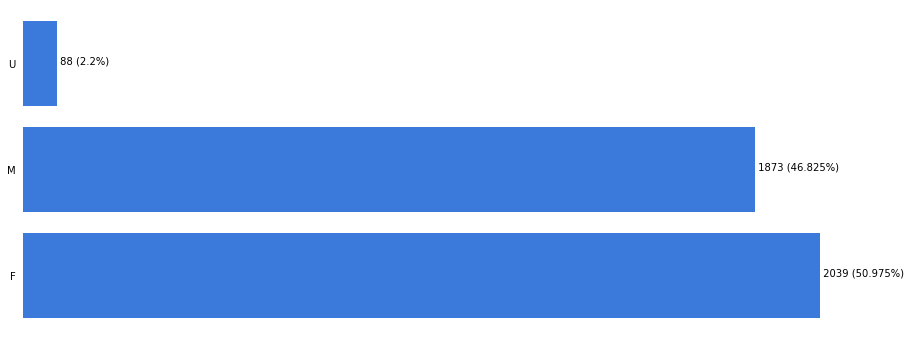

In [15]:
plt.rcParams["figure.figsize"] = 15, 6

fig, ax = plt.subplots()

ax.barh(cust_dem["gender"].value_counts().index, cust_dem["gender"].value_counts().values, color="#3b79db")

ax.set_frame_on(False)

ax.tick_params(left=False,
               bottom=False,
               labelbottom=False)

for index, value in enumerate(cust_dem["gender"].value_counts().values):
    ax.text(value, index, s=f" {value} ({value/40}%)")
    

plt.show()

- __51% of our customers are Female followed by Males making up 47% of the customer data and the remaining 2% is occupied up by Unkown gender category.__

### III. Past 3 Years Bike Related Purchases 

In [16]:
cust_dem.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,M,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,M,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,M,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,F,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [17]:
print("There are " + str(cust_dem["past_3_years_bike_related_purchases"].isna().sum()) +
      " empty values in the 'past_3_years_bike_related_purchases' column")

There are 0 empty values in the 'past_3_years_bike_related_purchases' column


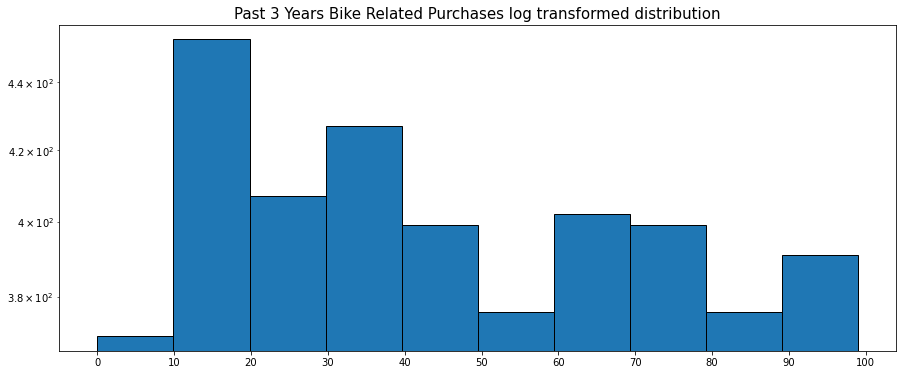

In [18]:
cust_dem["past_3_years_bike_related_purchases"].hist(grid=False, edgecolor="black", log=True)

plt.xticks(ticks=[i for i in range(0, 101, 10)])

plt.title("Past 3 Years Bike Related Purchases log transformed distribution", size=15)

plt.show()

- __As we can see many people buy 10-20 bike related products followed by 30-40 related products.__


### IV. DOB (Date of Birth)

In [19]:
cust_dem.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,M,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,M,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,M,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,F,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [20]:
print("There are " + str(cust_dem["DOB"].isna().sum()) + " empty values in the 'Date of Birth' column")

There are 87 empty values in the 'Date of Birth' column


In [21]:
print("The empty values make up " + str((cust_dem["DOB"].isna().sum() / len(cust_dem))*100) +
      "% of the total data so we will remove those missing values.")

The empty values make up 2.175% of the total data so we will remove those missing values.


In [22]:
# Dropping the missing values in the DOB column.
cust_dem.dropna(subset=["DOB"], inplace=True)
cust_dem.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,M,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,M,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,M,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,F,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [23]:
# Checking that we have removed the missing values.
cust_dem["DOB"].isna().sum()

0

- __Now we can augment the "DOB" column to create an Age column which will be of great help in later analysis.__

In [24]:
# Inserting the age column.
cust_dem.insert(loc=6, column="age", value=(2020 - cust_dem["DOB"].dt.year))

In [25]:
# As we can see we have successfully added the Age column. 
cust_dem.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,age,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,67,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,M,81,1980-12-16,40,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,M,61,1954-01-20,66,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,M,33,1961-10-03,59,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,F,56,1977-05-13,43,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


- __Looking at the upper and lower bounds of the age column will be interesting to see if there are any outliers.__

In [26]:
# The maximum age in the dataset is 177 which kinda seems unreal and also it is an outlier, so we will remove it.
cust_dem["age"].max()

177

In [27]:
cust_dem.loc[cust_dem["age"] == 177]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,age,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
33,34,Jephthah,Bachmann,U,59,1843-12-21,177,Legal Assistant,IT,Affluent Customer,N,NaN,No,20.0


In [28]:
# Now we have taken care of the 177 age.
cust_dem.drop(labels=33, axis="index", inplace=True)

In [29]:
# Now let's check.
cust_dem["age"].max()

89

In [30]:
# The lower bound of the age is looks good.
cust_dem["age"].min()

18

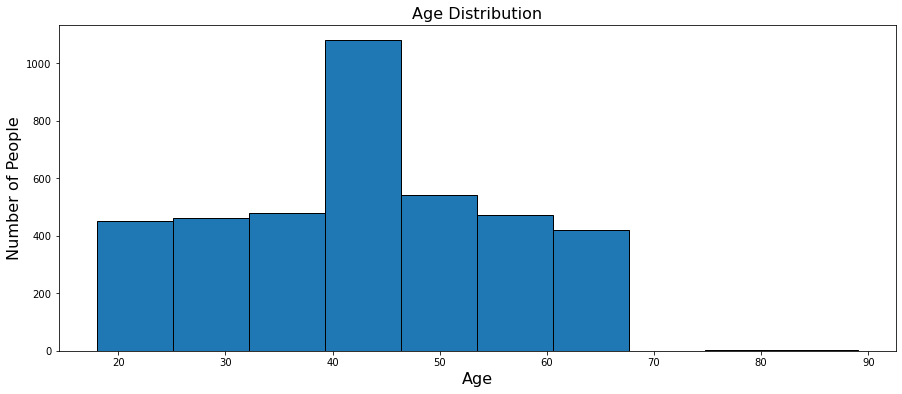

In [31]:
cust_dem["age"].hist(grid=False, bins=10, edgecolor="black")

plt.xlabel("Age", size=16)
plt.ylabel("Number of People", size=16)
plt.title("Age Distribution", size=16)

plt.show()

- Our age column looks normally distributed but there are some age groups that are outliers (75-90), To see those age groups better let's plot it on a log scale.

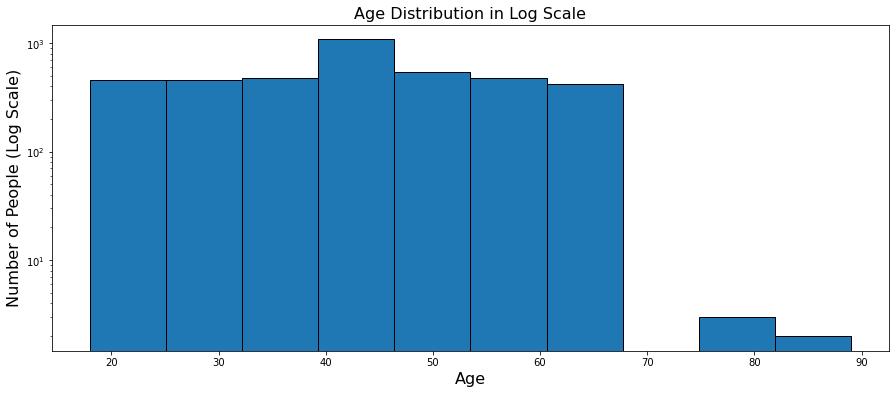

In [32]:
cust_dem["age"].hist(grid=False, bins=10, edgecolor="black", log=True)

plt.xlabel("Age", size=16)
plt.ylabel("Number of People (Log Scale)", size=16)
plt.title("Age Distribution in Log Scale", size=16)

plt.show()

In [33]:
# There are only 5 customers with age above 75 (0.12%) so this age group is an outlier so we will remove it.
cust_dem.loc[cust_dem["age"] > 75]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,age,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
657,658,Donn,Bonnell,M,38,1944-01-24,76,Tax Accountant,Manufacturing,Affluent Customer,N,ì¬íê³¼íì ì´íì°êµ¬ì,Yes,8.0
719,720,Darrel,Canet,M,67,1931-10-23,89,Recruiting Manager,Retail,Affluent Customer,N,1;DROP TABLE users,No,6.0
1091,1092,Katlin,Creddon,F,56,1935-08-22,85,VP Quality Control,Retail,Mass Customer,N,ì¬íê³¼íì ì´íì°êµ¬ì,No,5.0
2412,2413,Abbey,Murrow,M,27,1943-08-11,77,Environmental Specialist,Manufacturing,High Net Worth,N,á,Yes,17.0
3409,3410,Merrili,Brittin,F,93,1940-09-22,80,NaN,Property,Mass Customer,N,á,No,16.0


In [34]:
# Dropping the rows with age above 75.
cust_dem.drop(cust_dem.loc[cust_dem["age"] > 75].index, inplace=True)

In [35]:
cust_dem["age"].max()

67

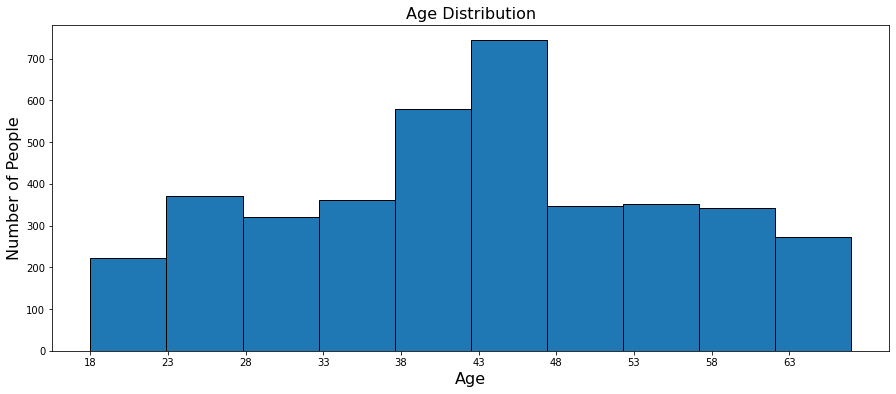

In [36]:
cust_dem["age"].hist(grid=False, bins=10, edgecolor="black")

plt.xticks(ticks=[i for i in range(18, 67, 5)])

plt.xlabel("Age", size=16)
plt.ylabel("Number of People", size=16)
plt.title("Age Distribution", size=16)

plt.show()

- __The distribution of our age column now looks better, the outliers have been removed.__

### V. Job Title and Job Industry Category

In [37]:
cust_dem.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,age,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,67,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,M,81,1980-12-16,40,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,M,61,1954-01-20,66,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,M,33,1961-10-03,59,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,F,56,1977-05-13,43,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [38]:
# There are 496 values in Job Title column that are missing.
cust_dem["job_title"].isna().sum()

496

- There are many ways we can approach this problem. We can simply remove those values in the column, We can also substitute the values with the most frequent value in the column.... But what we will do is fill those empty values with "Untitled" which I believe is a good way to approach this rather than dropping the values which will make us loose valuable information.

In [39]:
index_of_nan_value_in_job_title = cust_dem.loc[cust_dem["job_title"].isna()].index

cust_dem.loc[index_of_nan_value_in_job_title, "job_title"] = "Untitled"

In [40]:
# Checking..
cust_dem["job_title"].isna().sum()

0

In [41]:
cust_dem["job_title"].value_counts(normalize=True).head()

Untitled                                0.126952
Business Systems Development Analyst    0.011006
Tax Accountant                          0.010750
Social Worker                           0.010750
Internal Auditor                        0.010238
Name: job_title, dtype: float64

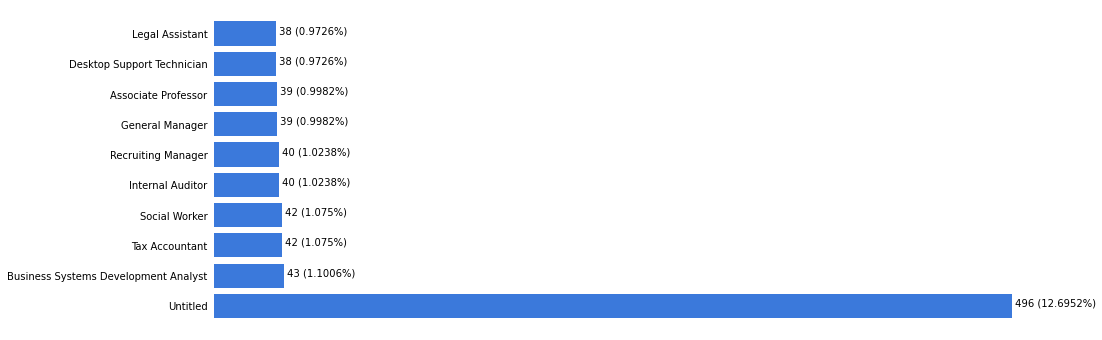

In [42]:
# Visualizing the 10 frequent Job titles.

fig, ax = plt.subplots()

ax.barh(cust_dem["job_title"].value_counts().head(10).index,
        cust_dem["job_title"].value_counts().head(10).values, color="#3b79db")

ax.set_frame_on(False)

ax.tick_params(left=False,
               bottom=False,
               labelbottom=False)

for index, value in enumerate(cust_dem["job_title"].value_counts().head(10).values):
    ax.text(value, index, s=f" {value} ({np.round(value/39.07, 4)}%)")


plt.show()

- __As we can see many customers (12.5%) didn't provide what their job title was. The other job titles were mentioned almost equally.__

In [43]:
cust_dem.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,age,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,67,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,M,81,1980-12-16,40,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,M,61,1954-01-20,66,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,M,33,1961-10-03,59,Untitled,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,F,56,1977-05-13,43,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [44]:
# There are 656 values in Job Industry Category column that are missing. 
cust_dem["job_industry_category"].isna().sum()

656

- __We will do similar thing as we did for the Job title column.__

In [45]:
index_of_nan_value_in_job_industry_category = cust_dem.loc[cust_dem["job_industry_category"].isna()].index

cust_dem.loc[index_of_nan_value_in_job_industry_category, "job_industry_category"] = "Untitled"

In [46]:
# Checkin
cust_dem["job_industry_category"].isna().sum()

0

In [47]:
cust_dem["job_industry_category"].value_counts(normalize=True)

Manufacturing         0.203225
Financial Services    0.196314
Untitled              0.167904
Health                0.152547
Retail                0.091119
Property              0.068083
IT                    0.038649
Entertainment         0.034809
Argiculture           0.028922
Telecommunications    0.018428
Name: job_industry_category, dtype: float64

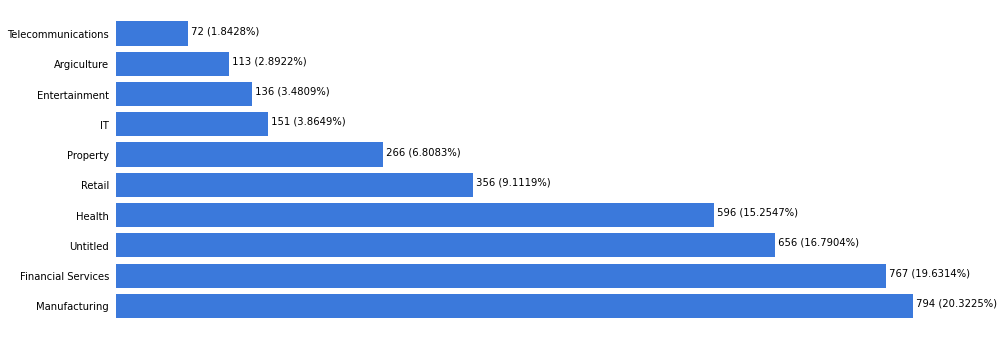

In [48]:
fig, ax = plt.subplots()

ax.barh(cust_dem["job_industry_category"].value_counts().index,
        cust_dem["job_industry_category"].value_counts().values, color="#3b79db")

ax.set_frame_on(False)

ax.tick_params(left=False,
               bottom=False,
               labelbottom=False)

for index, value in enumerate(cust_dem["job_industry_category"].value_counts().values):
    ax.text(value, index, s=f" {value} ({np.round(value/39.07, 4)}%)")


plt.show()

- __Most of our customers have a job in the `"Manufacturing"` Industry followed by `"Financial Services"`, the "`Untitled category"` (where the customers haven't specified their Job Industry), `"Health"`, `"Retail"` and `"Property"` which together make `88%` of the total job industry category.__

- __The smallest portion of our customers are from `"Telecommunication"`, `"Agriculture"`, `"Entertainment"` and `"IT"` which all together make `12%` of the total job industry category.__

### VI. Wealth Segment

In [49]:
cust_dem.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,age,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,67,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,M,81,1980-12-16,40,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,M,61,1954-01-20,66,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,M,33,1961-10-03,59,Untitled,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,F,56,1977-05-13,43,Senior Editor,Untitled,Affluent Customer,N,NIL,Yes,8.0


In [50]:
# There is no missing values in the wealth segment.
cust_dem["wealth_segment"].isna().sum()

0

- There are no missing values in the wealth segment column, its obvious because the company is the one that gives the customers the segments using various information about the customer like how much they spend, their salary, age and many other factors.

In [51]:
cust_dem["wealth_segment"].value_counts(normalize=True)

Mass Customer        0.499616
High Net Worth       0.254671
Affluent Customer    0.245713
Name: wealth_segment, dtype: float64

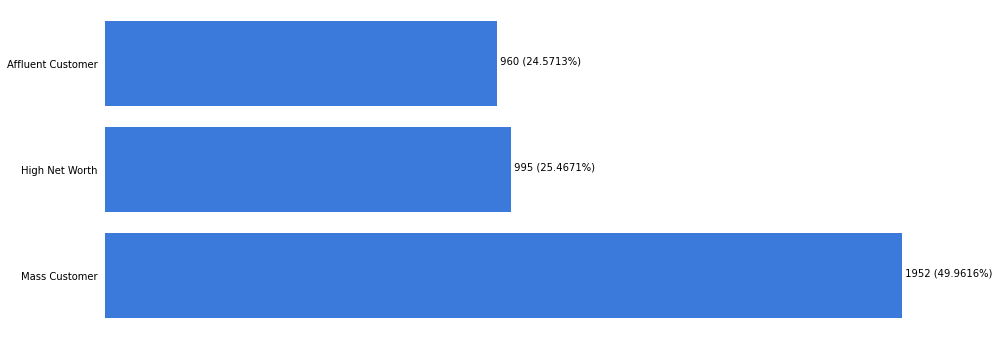

In [52]:
fig, ax = plt.subplots()

ax.barh(cust_dem["wealth_segment"].value_counts().index,
        cust_dem["wealth_segment"].value_counts().values, color="#3b79db")

ax.set_frame_on(False)

ax.tick_params(left=False,
               bottom=False,
               labelbottom=False)

for index, value in enumerate(cust_dem["wealth_segment"].value_counts().values):
    ax.text(value, index, s=f" {value} ({np.round(value/39.07, 4)}%)")


plt.show()

- __We can see that most of our customers are in the wealth segment `"Mass Customer"` with 50% followed by `"High Net Worth"` with 25% and finally `"Affluent Customer"` with 25%.__

- The `Mass Customer` segment refers to a large, undifferentiated group of customers with widely varied backgrounds.
- The `High-net-worth` segment refers to customers whose investible wealth exceed a given amount. Typically, these individuals are defined as holding financial assets with a value greater than USD 1 million.

- The `Affluent Customer` segment refers to customers having over USD 100,000 in household income and USD 250,000 or more in assets.

### VII. Deceased Indicator

In [53]:
cust_dem.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,age,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,67,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,M,81,1980-12-16,40,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,M,61,1954-01-20,66,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,M,33,1961-10-03,59,Untitled,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,F,56,1977-05-13,43,Senior Editor,Untitled,Affluent Customer,N,NIL,Yes,8.0


In [54]:
# There are 0 empty values in this column.
cust_dem["deceased_indicator"].isna().sum()

0

- `Deceased Indicator` column tells us whether or not a given customer is dead.

In [55]:
cust_dem["deceased_indicator"].value_counts()

N    3905
Y       2
Name: deceased_indicator, dtype: int64

- As we can see only 2 people in the dataset are deceased (dead) so we will remove the records because their are outliers.

In [56]:
cust_dem.loc[cust_dem["deceased_indicator"] == "Y"]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,age,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
752,753,Josy,St. Quentin,F,82,1970-03-07,50,Food Chemist,Health,Affluent Customer,Y,-0.5,Yes,6.0
3789,3790,Kurtis,Morson,M,91,1959-05-31,61,Senior Editor,Retail,Mass Customer,Y,ÌÌºÍÌ¹Ì¯ÍTÌ±Ì¤ÍÌ¥ÍÍhÍÌ²eÍÍÌ¼ÌÌÌ¼Ì£Í ÍÌÌ±Ì ÍÍÍN...,Yes,9.0


In [57]:
cust_dem.drop([752, 3789], inplace=True)

- Now we have removed the records with deceased indicated `Y`. And now all the values in the deceased indicator are `N` meaning all the customers in the dataset are alive, this doesn't give us any additional information so we will remove the whole column.

In [58]:
cust_dem["deceased_indicator"].unique()

array(['N'], dtype=object)

In [59]:
cust_dem.drop("deceased_indicator", axis=1, inplace=True)

In [60]:
cust_dem.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,age,job_title,job_industry_category,wealth_segment,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,67,Executive Secretary,Health,Mass Customer,"""'",Yes,11.0
1,2,Eli,Bockman,M,81,1980-12-16,40,Administrative Officer,Financial Services,Mass Customer,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,M,61,1954-01-20,66,Recruiting Manager,Property,Mass Customer,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,M,33,1961-10-03,59,Untitled,IT,Mass Customer,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,F,56,1977-05-13,43,Senior Editor,Untitled,Affluent Customer,NIL,Yes,8.0


### VIII. Default

In [61]:
cust_dem["default"]

0                                                      "'
1                            <script>alert('hi')</script>
2                                     2018-02-01 00:00:00
3       () { _; } >_[$($())] { touch /tmp/blns.shellsh...
4                                                     NIL
                              ...                        
3994                                                   á 
3995                                                 -100
3996                                             â¦testâ§
3998                               Â¡â¢Â£Â¢âÂ§Â¶â¢ÂªÂºââ 
3999                                                  0/0
Name: default, Length: 3905, dtype: object

- The `Default` column in our dataset looks gibberish, doesn't make sense and we weren't given about what it represents so we will remove the whole column.

In [62]:
cust_dem.drop("default", axis=1, inplace=True)

### IX. Owns Car and Tenure

In [63]:
cust_dem.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,age,job_title,job_industry_category,wealth_segment,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,67,Executive Secretary,Health,Mass Customer,Yes,11.0
1,2,Eli,Bockman,M,81,1980-12-16,40,Administrative Officer,Financial Services,Mass Customer,Yes,16.0
2,3,Arlin,Dearle,M,61,1954-01-20,66,Recruiting Manager,Property,Mass Customer,Yes,15.0
3,4,Talbot,NaN,M,33,1961-10-03,59,Untitled,IT,Mass Customer,No,7.0
4,5,Sheila-kathryn,Calton,F,56,1977-05-13,43,Senior Editor,Untitled,Affluent Customer,Yes,8.0


In [64]:
# There are 0 empty values in this column
cust_dem["owns_car"].isna().sum()

0

- The `Owns Car` column tells us whether the customer owns a car.

In [65]:
(cust_dem["owns_car"].value_counts(normalize=True))*100

Yes    50.448143
No     49.551857
Name: owns_car, dtype: float64

- Customers who own a car are almost equal to those who don't.

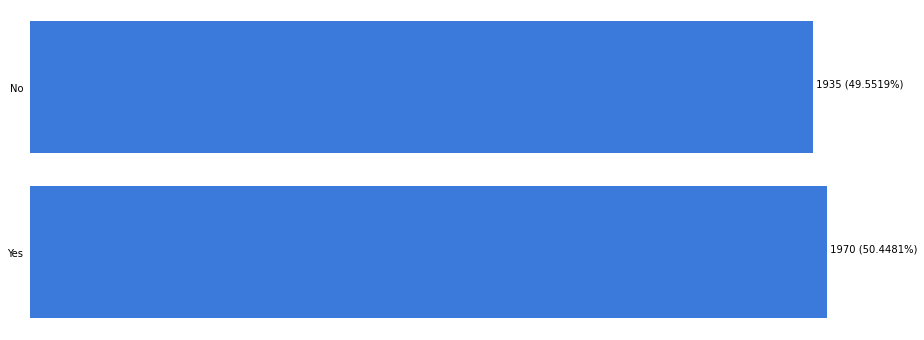

In [66]:
fig, ax = plt.subplots()

ax.barh(cust_dem["owns_car"].value_counts().index,
        cust_dem["owns_car"].value_counts().values, color="#3b79db")

ax.set_frame_on(False)

ax.tick_params(left=False,
               bottom=False,
               labelbottom=False)

for index, value in enumerate(cust_dem["owns_car"].value_counts().values):
    ax.text(value, index, s=f" {value} ({np.round(value/39.05, 4)}%)")


plt.show()

In [67]:
cust_dem.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,age,job_title,job_industry_category,wealth_segment,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,67,Executive Secretary,Health,Mass Customer,Yes,11.0
1,2,Eli,Bockman,M,81,1980-12-16,40,Administrative Officer,Financial Services,Mass Customer,Yes,16.0
2,3,Arlin,Dearle,M,61,1954-01-20,66,Recruiting Manager,Property,Mass Customer,Yes,15.0
3,4,Talbot,NaN,M,33,1961-10-03,59,Untitled,IT,Mass Customer,No,7.0
4,5,Sheila-kathryn,Calton,F,56,1977-05-13,43,Senior Editor,Untitled,Affluent Customer,Yes,8.0


- `Tenure` refers to the number of months that a customer has been subscribed for.

In [68]:
# There are 0 empty values in this column
cust_dem["tenure"].isna().sum()

0

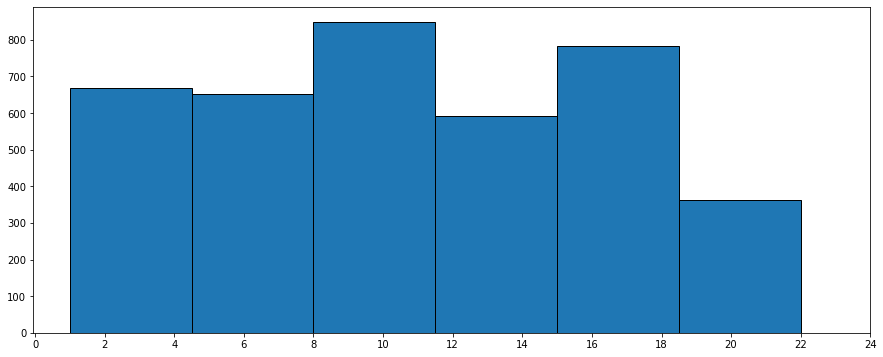

In [69]:
cust_dem["tenure"].hist(grid=False, edgecolor="black", bins=6)

plt.xticks(ticks=[i for i in range(0, 25, 2)])

plt.show()

- Customers with tenure in the range of 8-12 are the most frequent followed by customers with tenure in the range of 15-19. Smallest portion of the customers have a tenure in the range 19-22.

In [70]:
cust_dem.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,age,job_title,job_industry_category,wealth_segment,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,67,Executive Secretary,Health,Mass Customer,Yes,11.0
1,2,Eli,Bockman,M,81,1980-12-16,40,Administrative Officer,Financial Services,Mass Customer,Yes,16.0
2,3,Arlin,Dearle,M,61,1954-01-20,66,Recruiting Manager,Property,Mass Customer,Yes,15.0
3,4,Talbot,NaN,M,33,1961-10-03,59,Untitled,IT,Mass Customer,No,7.0
4,5,Sheila-kathryn,Calton,F,56,1977-05-13,43,Senior Editor,Untitled,Affluent Customer,Yes,8.0


# Customer Demographic: Data Quality Issues and resolving methods used

- **Last Name:** Contains Last names of customers. There were customers whose last name were not filled, We can remove those missing values from this column but since all customers have filled their first name it will be enough to identify the customers so we didn't remove values from this column. The Data Quality Issue in this column was **Incompleteness**.

- **Gender:** Contains the genders of each customers. But there was an **Inconsistency** in the values that were under this column. "M" and "Male" were put to indicate Male gender and "F", "Femal" and "Female" were put to indicate Female gender. We fixed this issue by replacing all "Male" with "M" and "F" for "Female" and "Femal".

- **DOB:** This column includes the date of birth of the customers. To simplify things a little bit we derived an Age column from it. There was one customer with an age of 177, which is unrealistic and also an outlier so we filtered it out. The Data Quality Issue here was **Inaccuracy**. After that there were a very small portion of the data (0.12%) with age above 75, this records are also outliers from the rest of the data, we filtered those out too.

- **Job Title:** This column includes the job titles of the customers. There were There are 497 blank values, 12.7% of the total dataset. We can simply remove them but we will be loosing valuable information for later analysis. The Data Quality Issue is **Incompelteness**. Rather than dropping it, We will fill those empty values with "Untitled" which I believe is a good way to approach this rather than dropping the values which will make us loose valuable information.

- **Job Industry Category:** This column includes job categories of the customers. There are 656 blank values, 16.7% of the total dataset. The Data Quality Issue expirenced here is also **Incompleteness**. Removing the missing values will make us loose valuable information. We will do same thing as the Job title column, Fill those empty values with "Untitled".

- **Deceased Indicator:** This column includes "Y" and "N" values to indicate whether the customers are alive or not. Only 0.05% of the total customers dataset are deceased so we don't have to include those to our dataset because, It's only 0.05% so won't bring that much value to our analysis. So We removed those indicated as "Y". Then all the rest of the customers were indicated as "N" so this column has **Irrelevant** information so we removed the whole column.

- **Default:** This column has values that are not understandable. We weren't given information about what this column represents. This column has **Irrelevant** information. Since It don't have any meaning we removed this column.

In [71]:
cust_dem

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,age,job_title,job_industry_category,wealth_segment,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,67,Executive Secretary,Health,Mass Customer,Yes,11.0
1,2,Eli,Bockman,M,81,1980-12-16,40,Administrative Officer,Financial Services,Mass Customer,Yes,16.0
2,3,Arlin,Dearle,M,61,1954-01-20,66,Recruiting Manager,Property,Mass Customer,Yes,15.0
3,4,Talbot,NaN,M,33,1961-10-03,59,Untitled,IT,Mass Customer,No,7.0
4,5,Sheila-kathryn,Calton,F,56,1977-05-13,43,Senior Editor,Untitled,Affluent Customer,Yes,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,3995,Rusty,Iapico,M,93,1975-12-12,45,Staff Scientist,Manufacturing,Mass Customer,Yes,14.0
3995,3996,Rosalia,Halgarth,F,8,1975-08-09,45,VP Product Management,Health,Mass Customer,No,19.0
3996,3997,Blanch,Nisuis,F,87,2001-07-13,19,Statistician II,Manufacturing,High Net Worth,Yes,1.0
3998,3999,Patrizius,NaN,M,11,1973-10-24,47,Untitled,Manufacturing,Affluent Customer,Yes,10.0


In [72]:
# Exporting the cleaned datset
cust_dem.to_csv(r"Exported Datasets/customer_demographic.csv", index=False)